# Computer Vision with PyTorch

## Abstract

On top of PyTorch, torchvision library utilized for a computer vision example. FashionMNIST from `torchvision.datasets` is used as data source. Dataset creation and transforms made according to `torchvision.transforms.v2` API. 

Total of 3 models were created throughout the example to conduct multiclass classification.
1. Simple linear model
2. Linear model with ReLU
3. CNN model based on TinyVGG

All models are trained and evaluated using FashionMNIST dataset. Later all models compared in the means of loss, accuracy and total training time. All data visualized. Confusion matrix as metric created for the best performing model. Then best performed model weights saved.

## Imports

In [2]:
# PyTorch imports
import torch 
import torch.nn as nn

# torchvision imports
import torchvision
from torchvision import datasets
import torchvision.transforms.v2 as transforms

# For visualization
import matplotlib.pyplot as plt

In [3]:
print("PyTorch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)

PyTorch version: 2.5.1+cu124
torchvision version: 0.20.1+cu124


## Getting Data
Instancing `datasets.FashionMNIST()` class creates the dataset for us. 
**Parameters:**
- root -> path to dataset
- train -> If `True` train split will be loaded, if `False` test split will be loaded.
- download -> download dataset if not present at root already.
- transform -> transform input samples according to some transform function.
- target_transform -> for providing a function to transform labels.

For input transform, `torchvision.transforms.v2` API utilized. Previously (in v1 API) .ToTensor() method was used to convert input to tensors. In v2 API, a transform composable created and steps of transform provided. For the dataset, input data is converted to torchvision Image tensor, then normalized to [0-1].

In [4]:
# transforms.ToTensor() is deprecated
# https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ToTensor.html#torchvision.transforms.v2.ToTensor
# https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Compose.html#torchvision.transforms.v2.Compose
# https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ToImage.html#torchvision.transforms.v2.ToImage
# https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ToDtype.html#torchvision.transforms.v2.ToDtype
dataset_transform = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(dtype=torch.float32, scale=True)
])

train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=dataset_transform,
    target_transform=None
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=dataset_transform,
    target_transform=None
)

### Inspecting Data

Dataset has 60.000 train and 10.000 test samples.

In [5]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [6]:
image, label = train_dataset[0]

image, label

(Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
          0.0000, 0.0039, 0.0157, 0.0000,

Usage of `VisionDataset.classes` to see target classes.

In [7]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Usage of `VisionDataset.class_to_idx` to see target classes with encoded labels. As it seems PyTorch is using integer encoding for label encoding.

In [8]:
train_dataset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Usage of `VisionDataset.targets` to see all target labels for given dataset.

In [9]:
# Labels of train data
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

By default in torchvision, input shape starts with color channels for visual datasets and followed by height and width.

In [10]:
print(f"Image shape {image.shape} as [num channels, height, width]")
print(f"Image label {train_dataset.classes[label]}")

Image shape torch.Size([1, 28, 28]) as [num channels, height, width]
Image label Ankle boot


### Visualizing Data

Text(0.5, 1.0, 'Ankle boot')

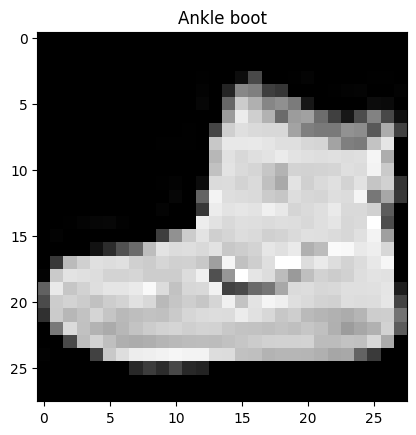

In [11]:
plt.figure()
# If single dimension for grayscale image not removed from shape, 
# TypeError: Invalid shape (1, 28, 28) for image data
# error will occur.
# Color channel should be last if image is RGB.
plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_dataset.classes[label])

Visualizing random samples from train dataset using matplotlib.

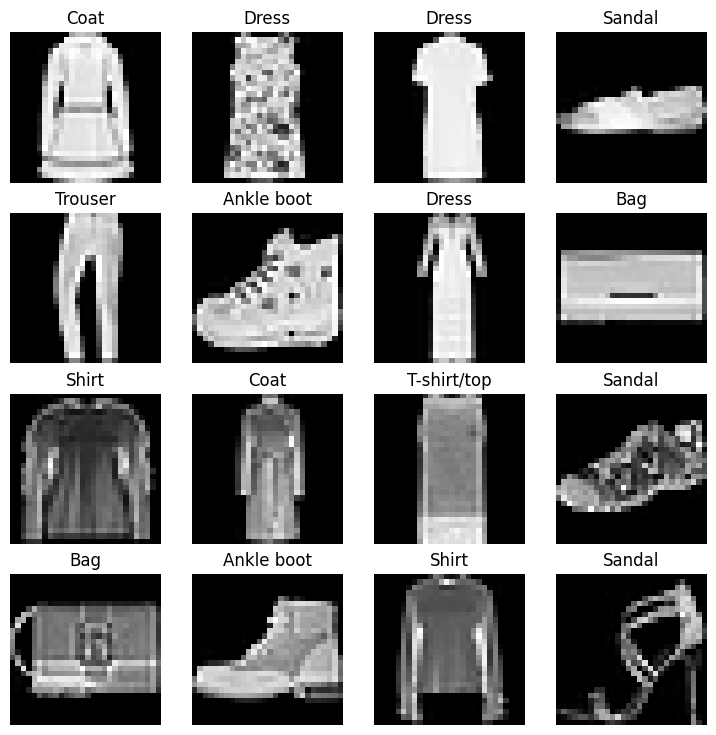

In [12]:
# use torch.manual_seed(7) for same outputs every time
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
  img, label = train_dataset[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(train_dataset.classes[label])
  plt.axis(False)

## Custom Data Pipeline

- Full documentation of PyTorch data handling -> https://pytorch.org/docs/stable/data.html
- Useful getting started with DataLoader by PyTorch -> https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In previous examples, [regression model](MODELS.md#model-creation-preparation-1-acquire-data) and [classification models](CLASSIFICATION.md), created data was synthetic and small hence was able to fit in CPU or GPU memory with no problems. But now dataset has 60000 samples of 28x28 images. Which can exhaust memory quickly. To overcome this problem we can **batch** or **mini-batch** our dataset.

Batch size of 32 is a good starting point. In many places you can see the phrase "batch size is decided according to your hardware". Partially true but bigger batch sizes can completely defeat the purpose of frequent gradient updating. This is a decision up to you.

While providing memory efficiency, using mini-batches also cause more frequent updates in gradients. Which is good for model generalization.

Batched DataLoader can be shuffled. Shuffling data is beneficial. If a dataset has same class sequentially in a batch, feeding it to a model in train time can cause bias and overfitting.

On the other hand test dataset will not cause any gradient updates, hence shuffling it is not needed.

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

- 60000 / 32 = 1875 batches
- 10000 / 32 = 312.5 rounded to 313 batches. Last batch has less than 32 samples. This part can be discarded with `drop_last=True` in DataLoader parameter.

In [14]:
print(f"Train dataloader: {train_dataloader}")
print(f"Test dataloader: {test_dataloader}")

print(f"Train dataloader size: {len(train_dataloader)} for batch size of {BATCH_SIZE}.")
print(f"Test dataloader size: {len(test_dataloader)} for batch size of {BATCH_SIZE}.")

Train dataloader: <torch.utils.data.dataloader.DataLoader object at 0x000001BB82357390>
Test dataloader: <torch.utils.data.dataloader.DataLoader object at 0x000001BB823904D0>
Train dataloader size: 1875 for batch size of 32.
Test dataloader size: 313 for batch size of 32.


### Data Shape of Batched Dataset

In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

print(f"Train feature shape for batch: {train_features_batch.shape} -> [batch size, color channel, height, width] (NCHW)")
print(f"Train labels shape for batch: {train_labels_batch.shape}")

Train feature shape for batch: torch.Size([32, 1, 28, 28]) -> [batch size, color channel, height, width] (NCHW)
Train labels shape for batch: torch.Size([32])


(-0.5, 27.5, 27.5, -0.5)

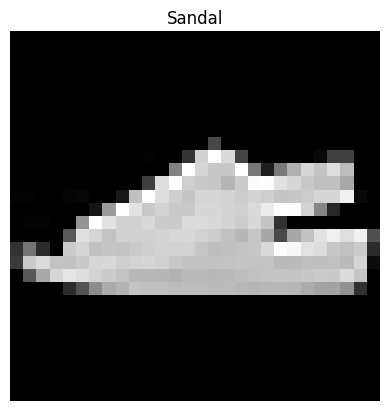

In [16]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(train_dataset.classes[label])
plt.axis(False)

## Creating Model

### Creating a Linear Model

Similar to creating a linear model with `nn.Linear` layers but this time our data is not a tensor with single dimension. In fact it is a tensor 28 by 28. Before feeding it through a Linear layer, input should be linearized too. This is where `nn.Flatten` layer comes in. Takes a multidimensional input and outputs it as a single one dimensional tensor. linear model is used for a baseline to improve upon.

Model input should be the amount of pixels in image (28x28=784) and the output should be the same as class count of the dataset (10).

With that fixed the model is like:

```python
Input Hidden Output

  o     o      o
  o     o      o
  o     o      o
  o     o      o
  .     .      .
  .     .      .
  .     .      .
 784    8      10 neurons.
```

In [17]:
class FashionMNISTModelv1(nn.Module):
    def __init__(self, in_size, hidden_units, out_size):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_size, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=out_size)
        )

    def forward(self, x):
        return self.layer_stack(x)


torch.manual_seed(7)
model1 = FashionMNISTModelv1(
    in_size=28*28,
    hidden_units=8,
    out_size=len(train_dataset.classes)
)

model1

FashionMNISTModelv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

#### Linear Model Loss Function and Optimizer

As in [multiclass classification example](CLASSIFICATION.MULTICLASS.md#loss-function) Cross Entropy Loss is used sinc our problem again is multiclass classification.

As optimizer, SGD is used with 0.1 learning rate.

In [18]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

#### Calculating Time Elapsed

To observe and report training time below helper function is written.

In [19]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device=None):
    """
    Calculates and prints elapsed time in seconds. Returns the time elapsed for external use.
    """
    total_time = end - start

    print(f"Elapsed time on device {device}: {total_time:4f} seconds.")

    return total_time

Example usage:

In [20]:
start_time = timer()

[i for i in range(int(1e6))]

end_time = timer()

print_train_time(start_time, end_time, "cpu")

Elapsed time on device cpu: 0.074341 seconds.


0.07434060000014142

#### Linear Model Training

Model train loop is the same except additional looping for batches. Simplified train loop is like so:
1. Loop for epochs
2. Loop for train batches and perform normal train steps, train loss calculated per batch
3. Loop for test batches and perform normal test steps, test loss calculated per batch

**Note:** All models trained with low epoch number because I am running on a local machine. 

In [ ]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn

# train loop
torch.manual_seed(7)

EPOCHS = 3

# start time for calculating train time 
train_start_time_on_cpu = timer()

for epoch in tqdm(range(1, EPOCHS+1)):
    print(f"Epoch {epoch}:\n")
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(train_dataloader):
        # set model mode to train
        model1.train()
        
        # zero the gradient buffers
        optimizer.zero_grad()

        # forward pass
        y_preds = model1(X)

        # calculate the batch loss
        loss = loss_fn(y_preds, y)
        loss += train_loss 
        
        # optional - track accuracy
        train_acc += accuracy_fn(y, y_preds.argmax(dim=1))

        # backpropagation
        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # test loop
    test_loss, test_acc = 0, 0
    model1.eval()
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            test_preds = model1(X_test)

            test_loss += loss_fn(test_preds, y_test)

            test_acc += accuracy_fn(y_test, test_preds.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
    print(
        f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")

# stop time for calculating train time
train_stop_time_on_cpu = timer()

model1_train_time = print_train_time(
    train_start_time_on_cpu, train_stop_time_on_cpu, str(next(model1.parameters()).device))

d:\PyTorch\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1:

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:37<01:15, 37.92s/it]

Train Loss: 0.0000 | Train Acc: 78.71 | Test Loss: 0.5016 | Test Acc: 82.13
Epoch 2:

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [01:11<00:35, 35.60s/it]

Train Loss: 0.0000 | Train Acc: 82.89 | Test Loss: 0.5188 | Test Acc: 81.83
Epoch 3:

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [01:48<00:00, 36.16s/it]

Train Loss: 0.0000 | Train Acc: 83.73 | Test Loss: 0.4699 | Test Acc: 83.42
Elapsed time on device cpu: 108.482765 seconds.


Helper function for evaluating model performance.

In [22]:
def eval_model(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = "cpu"):
    """
    Evaluates a given PyTorch model on a provided dataset.

    Args:
        model (torch.nn.Module): The model to evaluate.
        dataloader (torch.utils.data.DataLoader): DataLoader providing the dataset to evaluate on.
        loss_fn (torch.nn.Module): Loss function to calculate the loss.
        accuracy_fn (function): Function to calculate the accuracy. Should accept `y_true` and `y_pred` as arguments.

    Returns:
        dict: A dictionary containing the model name, average loss, and average accuracy.
            - "model_name" (str): The name of the model class.
            - "loss" (float): The average loss over the dataset.
            - "accuracy" (float): The average accuracy over the dataset.
    """

    model.eval()
    model.to(device)

    loss, acc = 0, 0
    with torch.inference_mode():
        for X, y in tqdm(dataloader):
            X, y = X.to(device), y.to(device)

            # Make predictions
            y_preds = model(X)

            # Calculate the loss
            loss += loss_fn(y_preds, y)

            # Calculate the accuracy
            acc += accuracy_fn(y_true=y, 
                                 y_pred=y_preds.argmax(dim=1))

        # Calculate average loss
        loss /= len(dataloader)

        # Calculate average accuracy
        acc /= len(dataloader)

    return {"model_name": model.__class__.__name__, #only works if model is class
            "loss": loss.item(),
            "accuracy": acc}

#### Linear Model Evaluation

In [151]:
model1_results = eval_model(model=model1,
                            dataloader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model1_results

100%|██████████| 313/313 [00:06<00:00, 45.23it/s]


{'model_name': 'FashionMNISTModelv1',
 'loss': 0.46991562843322754,
 'accuracy': 83.41653354632588}

### Setting Up Device Agnostic Code

Linear model was trained on CPU. Let's test if we use GPU for training will the train time be lesser.

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Creating Neural Network with Non-Linearity

Dataset has pretty basic shapes like slopes, lines and rectangles. Let's see if introducing non-linearity will improve accuracy. 

In [25]:
class FashionMNISTModelv2(nn.Module):
    def __init__(self, in_size, out_size, hidden_units):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_size, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_size),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.layer_stack(x)

torch.manual_seed(7)
model2 = FashionMNISTModelv2(in_size=28*28,
                             out_size=len(train_dataset.classes),
                             hidden_units=8
                             ).to(device)

next(model2.parameters()).device

device(type='cuda', index=0)

#### Reusable Train Loop

As stated in [linear model training](#linear-model-training) the train loop can be split up to 3 main processes. Epoch loop, train loop, test loop. Writing a function for all parts allows us to create reusable parts. After that we do not have to write a train loop all over again. A new training needed? Call the train method again with different parameters.

In [26]:
def train_single_epoch(model: torch.nn.Module,
                       dataloader: torch.utils.data.DataLoader,
                       loss_fn: torch.nn.Module,
                       optimizer: torch.optim.Optimizer,
                       accuracy_fn,
                       device: None):
    
    """Trains model single epoch by given parameters."""
    
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(dataloader):
        # Put data on target device 
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (outputs the raw logits from the model)
        y_pred = model(X)
        
        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()
    
    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")


def test_single_epoch(model: torch.nn.Module,
                      dataloader: torch.utils.data.DataLoader,
                      loss_fn: torch.nn.Module,
                      accuracy_fn,
                      device: None):
    
    """Tests a model for single epoch."""

    test_loss, test_acc = 0, 0
  
    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in dataloader:
            # Send the data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass (outputs raw logits)
            test_pred = model(X)

            # 2. Calculuate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

        # Adjust metrics and print out
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


def train_model(model: torch.nn.Module,
                train_dataloader: torch.utils.data.DataLoader,
                test_dataloader: torch.utils.data.DataLoader,
                epochs: int,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: None):
    
    for epoch in range(1, epochs+1):
        print(f"Epoch {epoch}\n")

        model.to(device)

        train_single_epoch(model=model,
                           dataloader=train_dataloader,
                           loss_fn=loss_fn,
                           optimizer=optimizer,
                           accuracy_fn=accuracy_fn,
                           device=device)
        
        test_single_epoch(model=model,
                          dataloader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          device=device)

#### Loss Function and Optimizer for Non-Linear Network

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

#### Train the Non-Linear Network

In [ ]:
# start time for calculating train time 
train_start_time_on_gpu = timer()

torch.manual_seed(7)
torch.cuda.manual_seed(7)
train_model(model=model2,
            train_dataloader=train_dataloader,
            test_dataloader=test_dataloader,
            epochs=3,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

# stop time for calculating train time 
train_stop_time_on_gpu = timer()

model2_train_time = print_train_time(
    train_start_time_on_gpu, train_stop_time_on_gpu, device)

Epoch 1

Train Loss: 1.00283 | Train Acc: 63.12%
Test loss: 0.77001 | Test acc: 71.79%

Epoch 2

Train Loss: 0.73487 | Train Acc: 73.04%
Test loss: 0.76459 | Test acc: 72.11%

Epoch 3

Train Loss: 0.70131 | Train Acc: 74.08%
Test loss: 0.70529 | Test acc: 73.85%

Elapsed time on device cuda: 123.909515 seconds.


#### Evaluate the Non-Linear Network

In [29]:
model2_results = eval_model(model2, test_dataloader, loss_fn, accuracy_fn, device)

100%|██████████| 313/313 [00:04<00:00, 69.42it/s]


### Creating a Convolutional Neural Network

**About CNN:**
- https://en.wikipedia.org/wiki/Convolutional_neural_network
- A video by IBM: https://youtu.be/QzY57FaENXg?feature=shared
- Convolution by 3Blue1Brown: https://youtu.be/KuXjwB4LzSA?feature=shared

[TinyVGG](https://poloclub.github.io/cnn-explainer/) network created with PyTorch to classify the dataset.

A convolutional network consists of 2 main parts:
1. One or more convolutional block as feature extractor
2. Fully connected layer as classifier

In [30]:
class FashionMNISTModelv3(nn.Module):
    def __init__(self, input_shape: int, units: int, output_shape: 
                 int, kernel_size: int|tuple, stride, padding):
        super().__init__()

        self.conv_0 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=units,
                      kernel_size=kernel_size, stride=stride, padding=padding),
            nn.ReLU(),
            nn.Conv2d(in_channels=units, out_channels=units,
                      kernel_size=kernel_size, stride=stride, padding=padding),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels=units, out_channels=units,
                      kernel_size=kernel_size, stride=stride, padding=padding),
            nn.ReLU(),
            nn.Conv2d(in_channels=units, out_channels=units,
                      kernel_size=kernel_size, stride=stride, padding=padding),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=units*7*7, out_features=output_shape),
            # nn.LazyLinear(output_shape) # Linear output can be calculated in runtime
            # or in forward method.
            # self.fc = None 
            # (forward method)
            # if self.fc is None:
            #     # Dynamically create the linear layer based on the feature size
            #     self.fc = nn.Linear(x.size(1), 10)
            #     x = self.fc(x)
            # or just calculate yourself
            # or just print out shape in forward method 
        )

    def forward(self, x):
        x = self.conv_0(x)
        # print(x.shape)
        x = self.conv_1(x)
        # print(x.shape)
        x = self.classifier(x)

        return x

In [31]:
torch.manual_seed(7)
torch.cuda.manual_seed(7)

model3 = FashionMNISTModelv3(input_shape=1, # number of color channels
                             units=10,
                             output_shape=len(train_dataset.classes),
                             kernel_size=3,
                             stride=1,
                             padding=1
                             )

#### Loss Function and Optimizer for CNN

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)

#### Training a CNN

Nothing different. In a linear unit, weight and bias was the learnable parameters. Similarly kernels are the structures holding weights and biasses to create feature maps as learnable parameters.

As can be seen, same train function used for CNN model.

In [33]:
train_cnn_start_time = timer()

torch.manual_seed(7)
torch.cuda.manual_seed(7)

train_model(model=model3, 
            train_dataloader=train_dataloader, 
            test_dataloader=test_dataloader, 
            epochs=3,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

train_cnn_stop_time = timer()

model3_train_time = print_train_time(
    train_cnn_start_time, train_cnn_stop_time, device)

Epoch 1

Train Loss: 0.63445 | Train Acc: 77.11%
Test loss: 0.40330 | Test acc: 85.05%

Epoch 2

Train Loss: 0.35826 | Train Acc: 87.09%
Test loss: 0.34139 | Test acc: 87.48%

Epoch 3

Train Loss: 0.31369 | Train Acc: 88.79%
Test loss: 0.31931 | Test acc: 88.70%

Elapsed time on device cuda: 118.684965 seconds.


#### Evaluation of CNN Model

In [34]:
model3_results = eval_model(model3, test_dataloader, loss_fn, accuracy_fn, device)

100%|██████████| 313/313 [00:05<00:00, 60.44it/s]


## Evaluation of Evaluations

Time to group and visualize the knowledge gained by training.

Let's start with accuracies of each trained model.

In [35]:
import pandas as pd

results_df = pd.DataFrame([model1_results,
                           model2_results,
                           model3_results])
results_df

,model_name,loss,accuracy
0,FashionMNISTModelv1,0.469916,83.416534
1,FashionMNISTModelv2,0.705292,73.851837
2,FashionMNISTModelv3,0.319310,88.698083


Then add training time elapsed for each model. Train time can be important metric for situations like the training hardware a cloud environment and is billed hourly. If a model shown competitive enough but slightly lower performance and lower training time it can be desirable instead of a model with slightly higher performance but higher train time.

We can se from the table below, training on GPU is actually slower compared to CPU training. Might be confusing considering a GPU is capable of handling matrix multiplications faster. But data has to be copied/transferred to GPU and this single handedly can create an overhead and slow down the training process. This is a good example of this situation. 

**Note:** Depending on the hardware you are running, your mileage may vary.

In [36]:
results_df["training_time"] = [model1_train_time, model2_train_time, model3_train_time]

results_df

,model_name,loss,accuracy,training_time
0,FashionMNISTModelv1,0.469916,83.416534,108.482765
1,FashionMNISTModelv2,0.705292,73.851837,123.909515
2,FashionMNISTModelv3,0.319310,88.698083,118.684965


<Axes: xlabel='Accuracy (%)', ylabel='Model Name'>

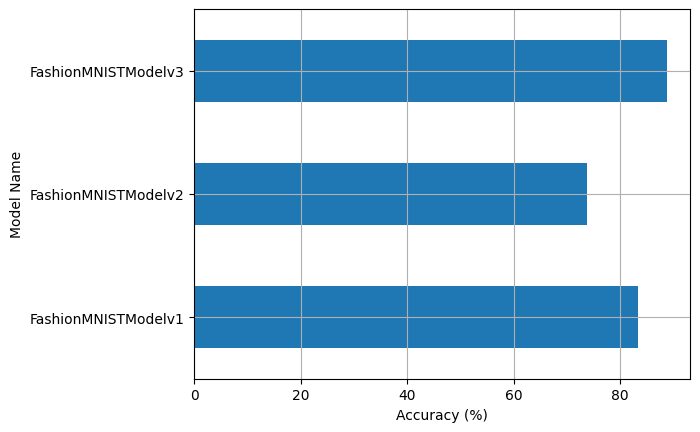

In [37]:
results_df.set_index("model_name")["accuracy"].plot(kind="barh", xlabel="Accuracy (%)", ylabel="Model Name", grid=True)

A helper function similar to `eval_model` but returns labels.

In [80]:
def make_predictions(model: torch.nn.Module, data: list, device: str):
    model.eval()
    model.to(device)

    """
    Runs inference with the given model on given data list and returns the predicted labels as tensor.
    """

    with torch.inference_mode():
        preds = []
        for x in data:
            # Add one dimension to beginning to simulate batch size of 1.
            # Then carry to target device.
            x = x.unsqueeze(dim=0).to(device)
            
            # Make predictions
            logit = model(x)

            # Remove extra dimension on logits,
            # apply softmax for prediction probabilities,
            # then take the prediction label.
            pred = logit.squeeze().softmax(dim=0).argmax(dim=0)

            # Add prediction to return list.
            preds.append(pred)
    
    # Return the predictions as tensor.
    return torch.stack(preds)

Get random samples from test dataset.

In [105]:
import random

# random.seed(7)
sample_images = []
sample_labels = []
for image, label in random.sample(list(test_dataset), k=9):
    sample_images.append(image)
    sample_labels.append(label)

sample_images[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

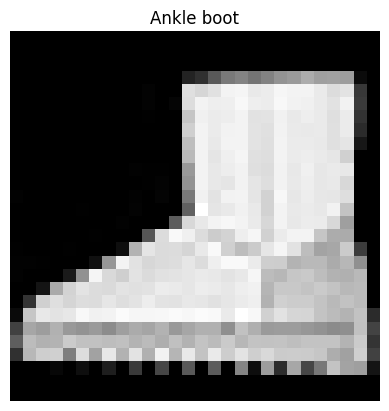

In [106]:
plt.imshow(sample_images[0].squeeze(), cmap="gray")
plt.title(test_dataset.classes[sample_labels[0]])
plt.axis(False)

Run inference on random samples and compare with ground truth labels.

In [107]:
sample_preds = make_predictions(model=model3, data=sample_images, device=device)

sample_preds, sample_labels

(tensor([9, 9, 5, 9, 4, 6, 4, 9, 4], device='cuda:0'),
 [9, 9, 5, 9, 4, 6, 4, 9, 2])

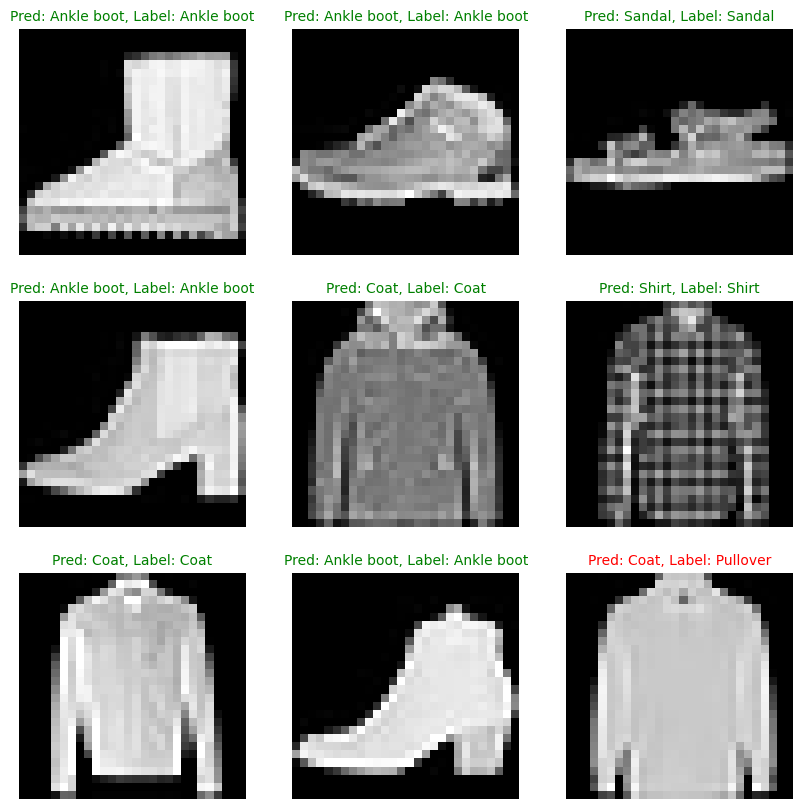

In [108]:
# Plot samples
plt.figure(figsize=(10, 10))
nrows, ncols = 3, 3

for i, sample in enumerate(sample_images):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    
    # Get prediction class names
    pred_class = test_dataset.classes[sample_preds[i]]

    # Get ground truth class
    true_class = test_dataset.classes[sample_labels[i]]

    title_text = f"Pred: {pred_class}, Label: {true_class}"

    if(true_class == pred_class):
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)
    

### Plotting a Confusion Matrix

In [119]:
test_pred_labels = []

model3.to(device)
model3.eval()

with torch.inference_mode():
    for image, label in tqdm(test_dataloader):
        image, label = image.to(device), label.to(device)

        # Make predictions - dataloader already bathed no need to add dimension.
        logit = model3(image)

        # logit -> prediction probability -> prediction label
        pred = logit.squeeze().softmax(dim=0).argmax(dim=1)
    
        test_pred_labels.append(pred.cpu())

test_pred_labels_tensor = torch.cat(test_pred_labels)
len(test_pred_labels_tensor)

100%|██████████| 313/313 [00:07<00:00, 42.23it/s]


10000

In [123]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
conf_mat = ConfusionMatrix(task="multiclass", num_classes=len(train_dataset.classes))
conf_mat_tensor = conf_mat(preds=test_pred_labels_tensor, target=test_dataset.targets)

conf_mat_tensor

tensor([[674,   5,  26,  63,   7,   0, 218,   0,   7,   0],
        [  5, 844,   5, 112,  24,   0,   9,   0,   1,   0],
        [ 13,   4, 761,  22, 108,   0,  89,   0,   2,   1],
        [ 20,   7,  11, 871,  47,   0,  37,   0,   6,   1],
        [  3,   3,  95,  45, 761,   0,  89,   0,   3,   1],
        [ 11,   1,   0,  12,   2, 772,   2,  98,  78,  24],
        [ 88,   5,  92,  58,  89,   0, 656,   0,  12,   0],
        [  0,   1,   0,   0,   0,  25,   1, 914,  15,  44],
        [  6,   2,   5,  12,  13,   3,  14,   6, 938,   1],
        [  2,   0,   0,   3,   0,  24,   7,  71,  17, 876]])

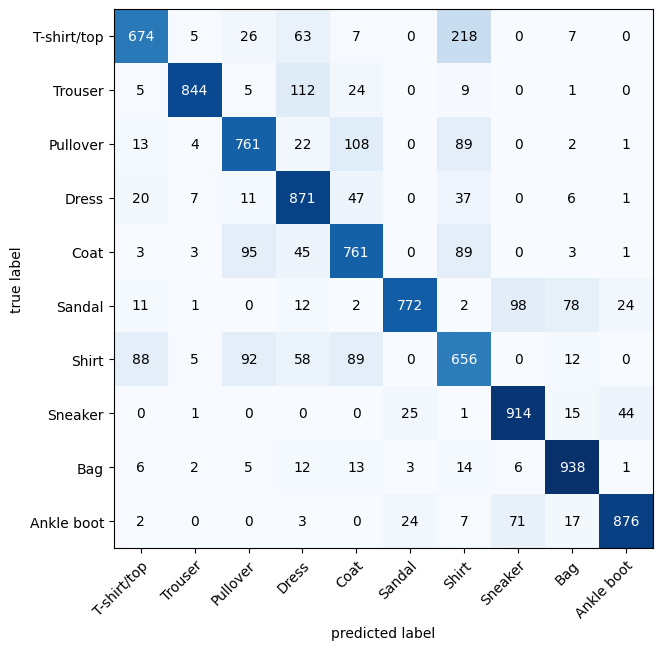

In [133]:
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_tensor.numpy(),
                                    class_names=test_dataset.classes,
                                    figsize=(10,7),
                                    # show_normed=True,
                                    # show_absolute=False,
                                    # colorbar=True
                                    )

## Saving Best Performed Model

In [134]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "FashionMNIST_cnn_model.pth"
SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {SAVE_PATH}")
torch.save(obj=model3.state_dict(), f=SAVE_PATH)

Saving model to models\FashionMNIST_cnn_model.pth


## Loading Best Performed Model

In [136]:
# Create new instance of model to load weights
loaded_model = FashionMNISTModelv3(input_shape=1, # number of color channels
                                   units=10,
                                   output_shape=len(train_dataset.classes),
                                   kernel_size=3,
                                   stride=1,
                                   padding=1)

loaded_model.load_state_dict(torch.load(f=SAVE_PATH, weights_only=True))

loaded_model.to(device)

FashionMNISTModelv3(
  (conv_0): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_1): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Evaluating Loaded Model

In [137]:
torch.manual_seed(7)

loaded_results = eval_model(model=loaded_model, dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

loaded_results

100%|██████████| 313/313 [00:08<00:00, 35.24it/s]


{'model_name': 'FashionMNISTModelv3',
 'loss': 0.31930989027023315,
 'accuracy': 88.69808306709265}

Compare the Results of Loaded Model from Baseline Programmatically

In [150]:
torch.isclose(torch.tensor(model3_results["loss"]),
              torch.tensor(loaded_results["loss"]),
              # atol=1e-2 # (optional) set tolerance
              )

tensor(True)